In [1]:
import numpy as np
import pandas as pd

In [2]:
%precision 3 # jupiter notebook의 출력을 소수점 이하 3지리로 제한

ValueError: Precision must be int or format string, not '3 # jupiter notebook의 출력을 소수점 이하 3지리로 제한'

In [3]:
pd.set_option('display.float_format','{:3f}'.format) # dataframe의 출력을 소수점 이하 3자리로 제한
# pd.set.option('display.float_format',None) # : 원래 형태로 되돌아감

In [4]:
df = pd.read_csv('data/ch2_scores_em.csv',
                 index_col='student number') # 컬럼명에 띄어쓰기 하지말자

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   english      50 non-null     int64
 1   mathematics  50 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


In [6]:
np.__version__ 

'1.21.5'

In [7]:
pd.__version__

'1.4.4'

In [8]:
np.mean(df['english'])

58.38

In [9]:
# 학번 순서대로 10명의 영어 점수를 array 데이터 구조 scores에 
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [10]:
df['english'].values[:10] # 인덱스 컬럼빼고 값만 저장

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [11]:
score_df = pd.DataFrame({'score':scores},
            index=pd.Index(['A','B','C','D','E','F','G','H','I','J'],
                            name = 'student'))

In [12]:
score_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [13]:
sum(scores)/len(scores) # 앤디어레이

55.0

In [14]:
sum(score_df['score'])/len(score_df['score']) # 시리즈

55.0

In [15]:
np.mean(scores)

55.0

In [16]:
np.mean(score_df['score'])

55.0

In [17]:
score_df['score'].mean() # 데이터프레임

55.0

In [18]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [19]:
# 중앙값 구하기
n = len(sorted_scores)
if n % 2 == 0: # 이 조건 만족하는 것은 짝수
    m0 = sorted_scores[n//2-1]# // : 나눠서 몫 구함/ []:인덱스
    m1 = sorted_scores[n//2]
    median = (m0+m1)/2
else:
    median = sorted_scores[{(n+1)//2-1}]
median

56.5

In [20]:
score_df.median()

score   56.500000
dtype: float64

In [21]:
score_df.mode() # mode: 최빈값

,score
0,65


In [22]:
pd.Series([1,1,2,2,3]).mode() # 평균, 중앙값과 달리 값이 여러 개 나올 수 있음

0    1
1    2
dtype: int64

In [23]:
pd.Series([1,2,3,4,5,6,7]).mode() # 최빈값은 연속 데이터에서 무의미, 이상값에서 사용

0    1
1    2
2    3
3    4
4    5
5    6
6    7
dtype: int64

In [24]:
# 데이터의 산포도 지표 /편차: 각 데이터가 평균으로부터 떨어져 있는 정도, 편차의 합,평균: 0이라 지표로 활용하기 어려움

In [25]:
mean = np.mean(scores)
mean

55.0

In [26]:
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [27]:
deviation.sum()

0.0

In [28]:
deviation.mean()

0.0

In [29]:
summary_df = score_df.copy()
summary_df['deviation'] = deviation
summary_df

,score,deviation
student,,
A,42,-13.000000
B,69,14.000000
C,56,1.000000
D,41,-14.000000
E,57,2.000000
F,48,-7.000000
G,65,10.000000
H,49,-6.000000
I,65,10.000000


In [30]:
summary_df.mean()

score       55.000000
deviation    0.000000
dtype: float64

In [31]:
np.mean(deviation ** 2) #분산 : 편차 제곱의 평균

86.0

In [32]:
np.var(scores)

86.0

In [35]:
score_df.var(ddof = 1) # numpy는 1이 기본
# 86.0보다 큼, (n-1)로 나눠서/ pandas는 dataframe이나 series의 var메서드는 불편분산-> n-1

score   95.555556
dtype: float64

In [36]:
score_df.var(ddof = 0) # pandas의 표본분산은 var메서드의 인수 ddof = 0(자유도 x), = 1(자유도 o)

score   86.000000
dtype: float64

In [37]:
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.000000,169.000000
B,69,14.000000,196.000000
C,56,1.000000,1.000000
D,41,-14.000000,196.000000
E,57,2.000000,4.000000
F,48,-7.000000,49.000000
G,65,10.000000,100.000000
H,49,-6.000000,36.000000
I,65,10.000000,100.000000


In [40]:
np.sqrt(np.var(scores,ddof = 0))

9.273618495495704

In [42]:
np.std(scores,ddof=0) # ddof 적어주기

9.273618495495704

In [47]:
score_df.std(ddof=0)

score   9.273618
dtype: float64

In [48]:
np.max(scores)-np.min(scores)

28

In [52]:
scores_q1 = np.percentile(scores,25) 
scores_q2 = np.percentile(scores,50) # median, 중위수가 기본
scores_q3 = np.percentile(scores,75) 
scores_q1, scores_q2, scores_q3

(48.25, 56.5, 63.25)

In [54]:
scores_iqr = scores_q3 - scores_q1
scores_iqr

15.0

In [55]:
# 상한, 하한 제한을 두려면 사분범위 x 1.5

In [57]:
score_df.describe()

,score
count,10.000000
mean,55.000000
std,9.775252
min,41.000000
25%,48.250000
50%,56.500000
75%,63.250000
max,69.000000


In [58]:
# 표준화: 상대적 결과가 다르므로 통일된 지표로 변환하는 정규화, 데이터에서 평균을 빼고 표준편차로 나누는 작업,표준화된 데이터는 평균이 0, 표준편차가 1

In [59]:
z = (scores - np.mean(scores))/np.std(scores)

In [60]:
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [62]:
np.round(np.mean(z),3)

-0.0

In [65]:
np.std(z,ddof=1)

1.0540925533894596

In [66]:
# 편찻값: 평균이 50, 표준편차가 10이 되도록 정규화한 값

In [68]:
z = 50 + 10 * (scores - np.mean(scores))/np.std(scores)

In [70]:
np.mean(z)

50.0

In [72]:
np.std(z)

10.000000000000002

In [73]:
z

array([35.98173948, 65.09658825, 51.07832773, 34.90341175, 52.15665546,
       42.45170588, 60.78327732, 43.53003361, 60.78327732, 53.2349832 ])

In [74]:
score_df['deviation value'] = z

In [75]:
score_df

,score,deviation value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


In [76]:
# 1차원 데이터의 시각화

In [78]:
english_scores = np.array(df['english'])

In [79]:
pd.Series(english_scores).describe()

count   50.000000
mean    58.380000
std      9.799813
min     37.000000
25%     54.000000
50%     57.500000
75%     65.000000
max     79.000000
dtype: float64

In [80]:
df['english'].describe()

count   50.000000
mean    58.380000
std      9.799813
min     37.000000
25%     54.000000
50%     57.500000
75%     65.000000
max     79.000000
Name: english, dtype: float64

In [81]:
# 도수분포표: 연속적 데이터

In [88]:
freq, _ = np.histogram(df['english'],bins=10,range=(0,100)) # _: 개수는 채우되 쓰지는 않을 때

In [89]:
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [92]:
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
freq_class

['0~10',
 '10~20',
 '20~30',
 '30~40',
 '40~50',
 '50~60',
 '60~70',
 '70~80',
 '80~90',
 '90~100']

In [95]:
freq_dist_df = pd.DataFrame({'frequency':freq},
                           index = pd.Index(freq_class,
                                            name='class'))

In [97]:
freq_dist_df # 도수분포표

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [98]:
# 계급값: 각 계급을 대표하고 계급의 중앙값을 이용

In [100]:
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [101]:
# 상대도수: 전체 데이터에서 해당 계급의 데이터가 차지하는 비율

In [102]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [103]:
# 누적상대도수: 해당 계급까지의 상대도수의 합

In [104]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [108]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq # 상대도수
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df.head(2)

,frequency,class value,relative frequency,cumulative relative frequency
class,,,,
0~10,0,5,0.000000,0.000000
10~20,0,15,0.000000,0.000000


In [114]:
freq_dist_df = freq_dist_df[ ['class value', 'frequency', 'relative frequency',
       'cumulative relative frequency']]

In [115]:
freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.000000,0.000000
10~20,15,0,0.000000,0.000000
20~30,25,0,0.000000,0.000000
30~40,35,2,0.040000,0.040000
40~50,45,8,0.160000,0.200000
50~60,55,16,0.320000,0.520000
60~70,65,18,0.360000,0.880000
70~80,75,6,0.120000,1.000000
80~90,85,0,0.000000,1.000000


In [116]:
# 최빈값: 최대가 되는 계급의 계급값

In [117]:
import matplotlib.pyplot as plt

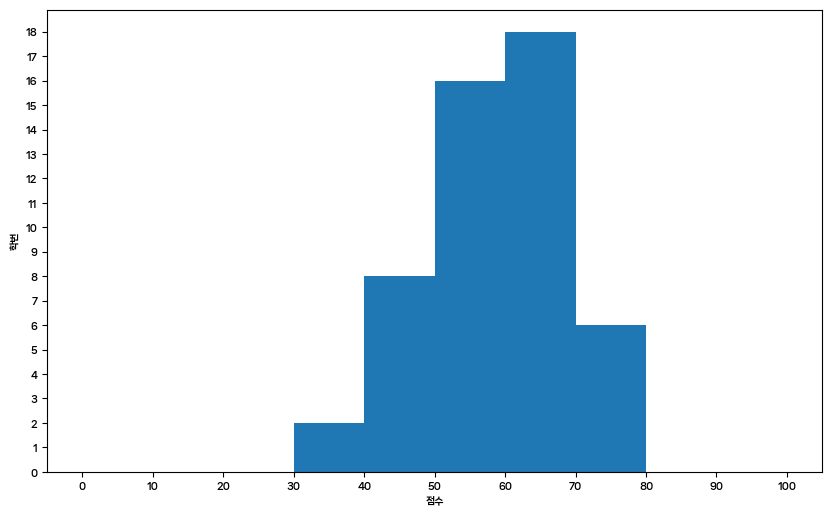

In [124]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111) # 111: 1행의 1열의 1번째
freq, _, _ = ax.hist(df['english'],bins=10,range=(0,100))
ax.set_xlabel('점수')
ax.set_ylabel('학번')
ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0,freq.max()+1))
plt.show()

In [137]:
# 계급수를 25, 계급폭을 4점으로 하는 히스토그램을 누적 상대도수의 꺾은 그래프와 함께 그림

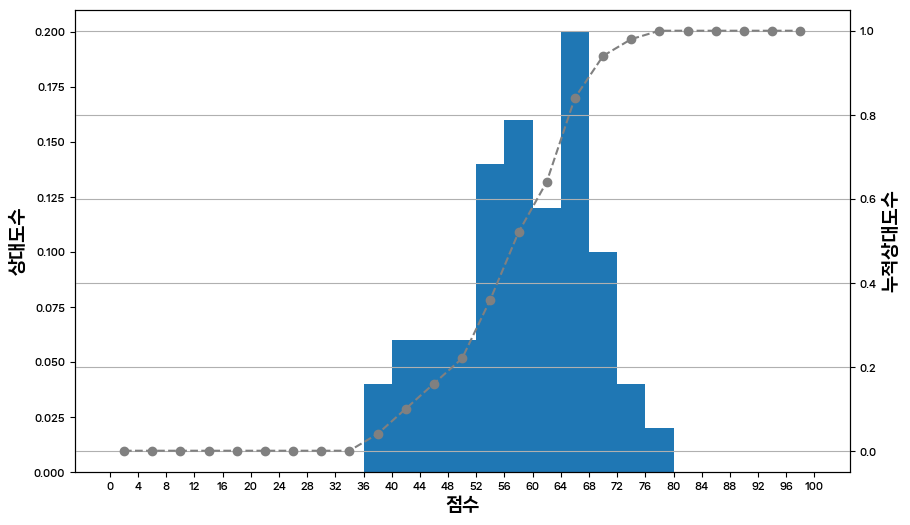

In [151]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _,_ = ax1.hist(english_scores,bins=25,range=(0,100),weights=weights)
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq
class_value = [(i + (i+4))//2 for i in range(0,100,4)]
ax2.plot(class_value,cum_rel_freq,ls = '--',marker ='o',color = 'gray')
ax2.grid(visible=True)
ax1.set_xlabel('점수',size=13)
ax1.set_ylabel('상대도수',size=13)
ax2.set_ylabel('누적상대도수',size=13)
ax1.set_xticks(np.linspace(0,100,25+1))
plt.show()

In [126]:
english_scores.shape

(50,)

In [127]:
english_scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70, 47, 51, 64, 62, 70, 71,
       68, 73, 37, 65, 65, 61, 52, 57, 57, 75, 61, 47, 54, 66, 54, 54, 42,
       37, 79, 56, 62, 62, 55, 63, 57, 57, 67, 55, 45, 66, 55, 64, 66],
      dtype=int64)

In [131]:
np.ones_like(english_scores)/len(english_scores)

array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02])

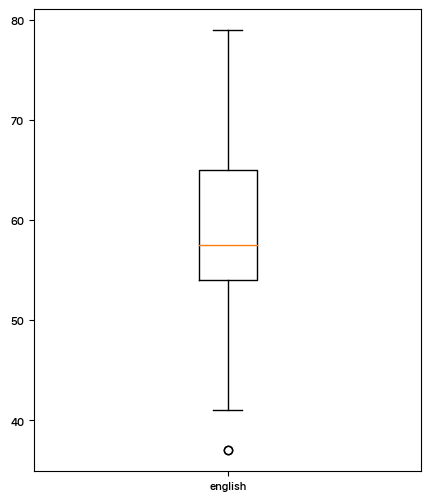

In [147]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores,labels=['english'])
plt.show() # show(): 값이 다 나오게 함